In [1]:
import pandas as pd
import torch as t

from master_thesis.core.utils.reproducibility import seed_everything
from master_thesis.core.probes import LRProbe, MMProbe, LDAProbe, SVMProbe
from master_thesis.core.separability.linear_model_separabiliy import (
    LinearModelSeparability,
)

DEVICE = "cuda"
PROMPT_TYPE = "few_shot"
POSITIVE_TOKEN = "true"
NEGATIVE_TOKEN = "false"
MODEL = "LLAMA_2_7B_CHAT"

DATA_DIR = "../../../../data"
DATASETS_DIR = f"{DATA_DIR}/datasets/base_experiments/cebab/train"

In [2]:
seed_everything()

### Label aspect

In [3]:
ASPECTS = {
    "food": 0.89,
    "ambiance": 0.83,
    "service": 0.865,
    "noise": 0.645,
}

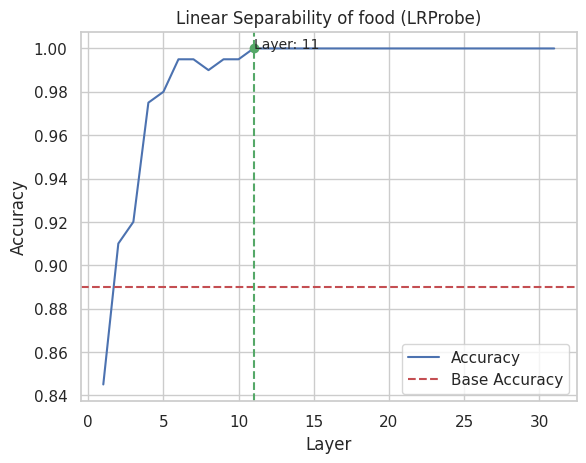

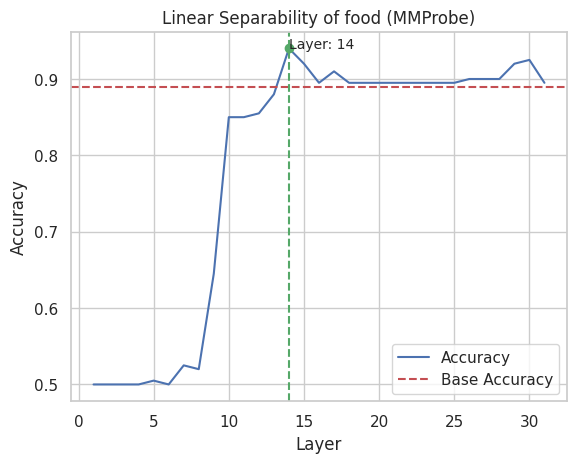

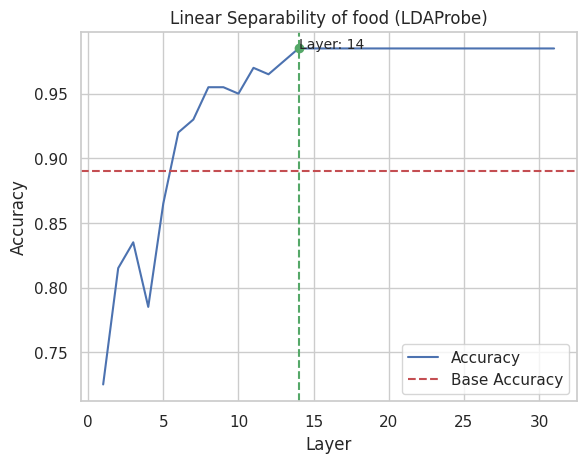

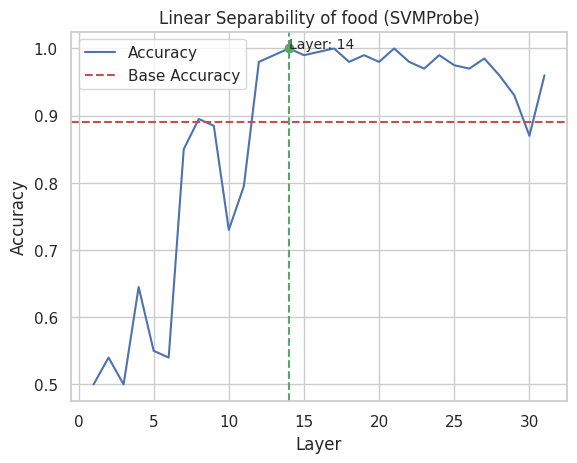

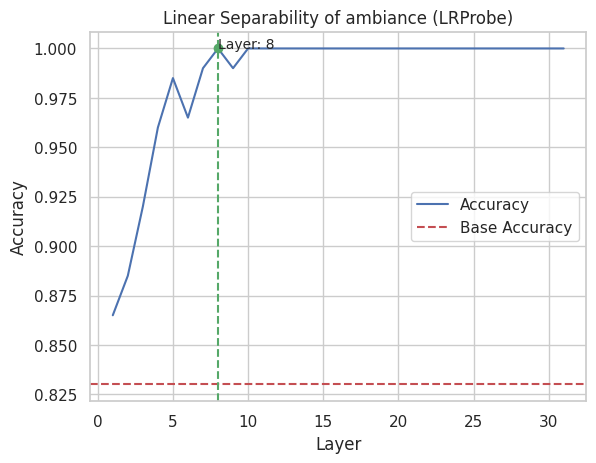

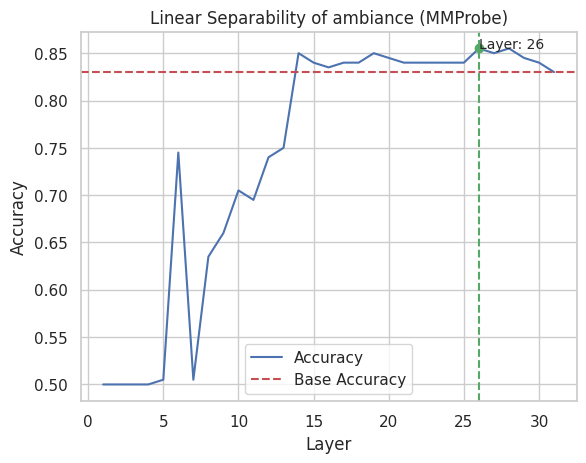

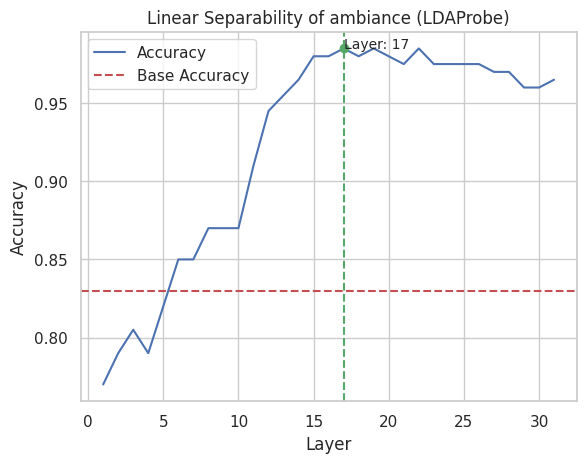

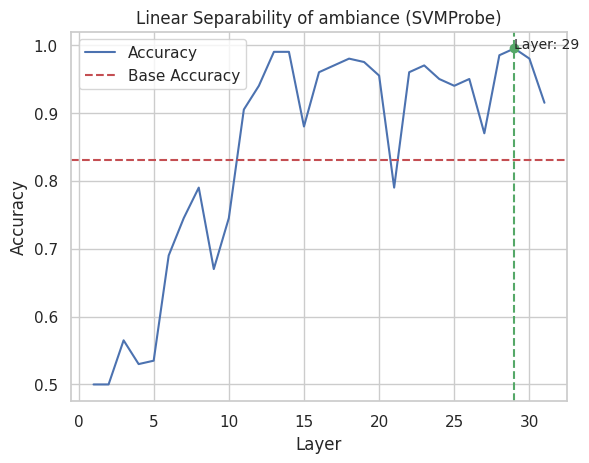

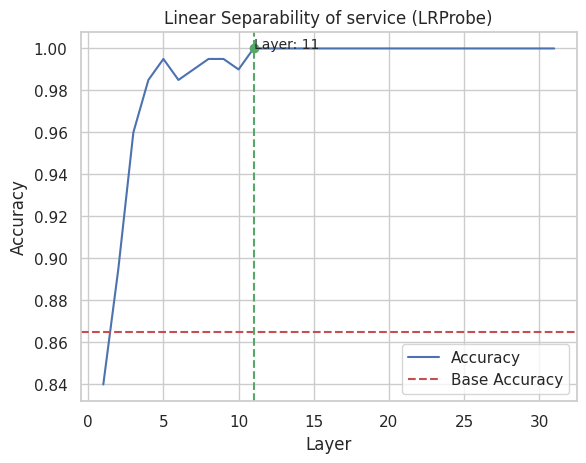

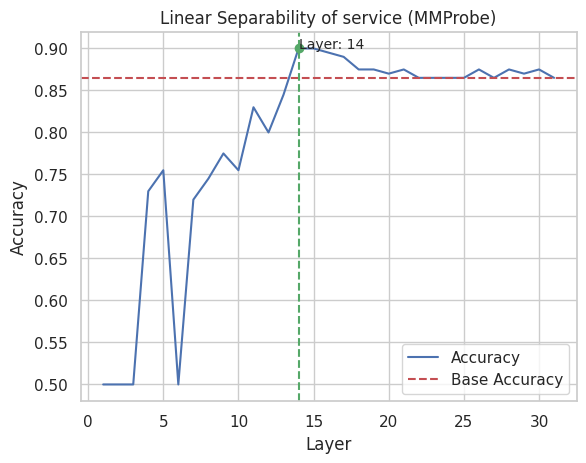

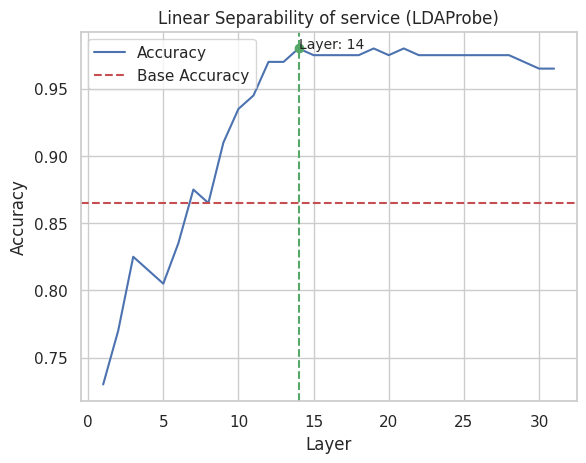

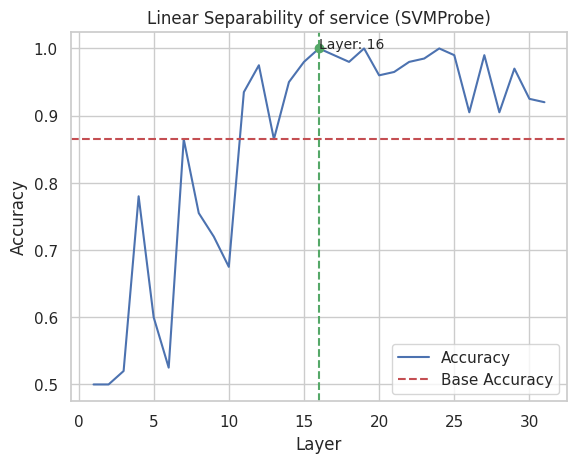

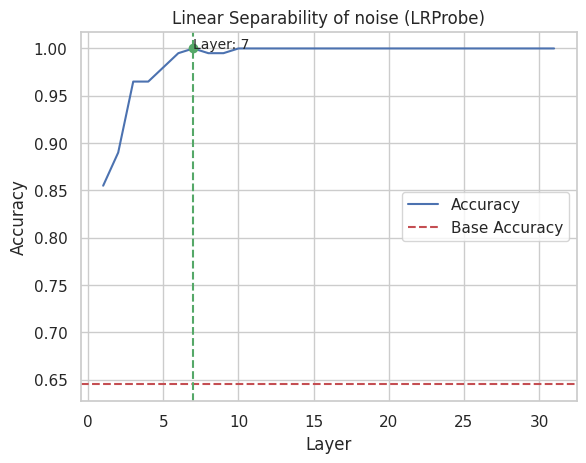

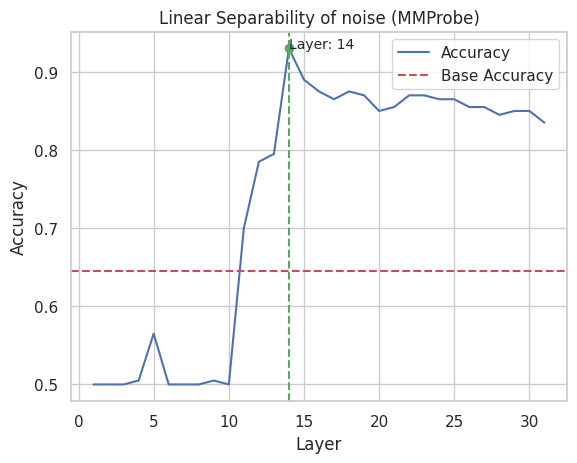

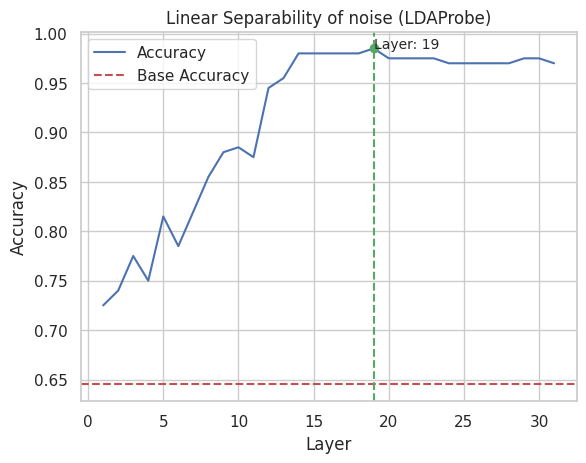

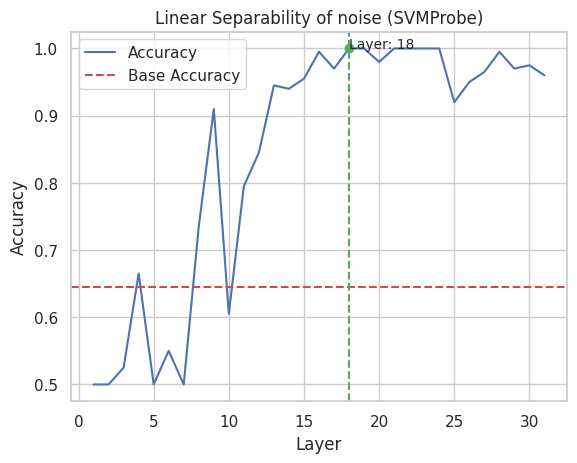

In [4]:
for aspect, score in ASPECTS.items():
    activations_dir = f"{DATA_DIR}/activations/{MODEL}/base_experiments/cebab/train/few_shot_{aspect}_aspect"
    aspect_df = pd.read_csv(f"{DATASETS_DIR}/{aspect}_aspect.csv")

    for linear_model in [LRProbe, MMProbe, LDAProbe, SVMProbe]:
        linear_model_separability = LinearModelSeparability(
            probe_class=linear_model,
            device=DEVICE,
            activations_dir=activations_dir,
            dataset=aspect_df,
            aspect=aspect,
            layers=range(1, 32),
            base_accuracy=score,
        )

        linear_model_separability.plot_separability_score(
            show=True,
            save_path=f".cache/linear_model_separability/{linear_model.__name__}_{aspect}_aspect.png",
        )